In [ ]:
install.packages("mice")
install.packages("ggplot2")
install.packages("caret")
install.packages("dplyr")
install.packages("GGally")
install.packages("ROSE")
install.packages("randomForest")
install.packages("e1071")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘reshape’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
set.seed(07032021)

library(mice)
library(ggplot2)
library(caret)
library(dplyr)
library(GGally)
library(ROSE)
library(randomForest)
library(e1071)
install.packages("colorspace")


Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind


Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loaded ROSE 0.0-4


randomForest 4.7-1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
stroke<-read.csv("healthcare-dataset-stroke-data.csv")

sapply(stroke, class)

id            gender               age      hypertension 
        "integer"       "character"         "numeric"         "integer" 
    heart_disease      ever_married         work_type    Residence_type 
        "integer"       "character"       "character"       "character" 
avg_glucose_level               bmi    smoking_status            stroke 
        "numeric"       "character"       "character"         "integer"

In [ ]:
stroke$stroke<- factor(stroke$stroke, levels = c(0,1), labels = c("No", "Yes"))
stroke$gender<-as.factor(stroke$gender)
stroke$hypertension<- factor(stroke$hypertension, levels = c(0,1), labels = c("No", "Yes"))
stroke$heart_disease<- factor(stroke$heart_disease, levels = c(0,1), labels = c("No", "Yes"))
stroke$ever_married<-as.factor(stroke$ever_married)
stroke$work_type<-as.factor(stroke$work_type)
stroke$Residence_type<-as.factor(stroke$Residence_type)
stroke$smoking_status<-as.factor(stroke$smoking_status)
stroke$bmi<-as.numeric(stroke$bmi)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [ ]:
summary(stroke)


       id           gender          age        hypertension heart_disease
 Min.   :   67   Female:2994   Min.   : 0.08   No :4612     No :4834     
 1st Qu.:17741   Male  :2115   1st Qu.:25.00   Yes: 498     Yes: 276     
 Median :36932   Other :   1   Median :45.00                             
 Mean   :36518                 Mean   :43.23                             
 3rd Qu.:54682                 3rd Qu.:61.00                             
 Max.   :72940                 Max.   :82.00                             
                                                                         
 ever_married         work_type    Residence_type avg_glucose_level
 No :1757     children     : 687   Rural:2514     Min.   : 55.12   
 Yes:3353     Govt_job     : 657   Urban:2596     1st Qu.: 77.25   
              Never_worked :  22                  Median : 91.89   
              Private      :2925                  Mean   :106.15   
              Self-employed: 819                  3rd Qu.:114.09   


Warning message:
“Removed 201 rows containing missing values (geom_point).”


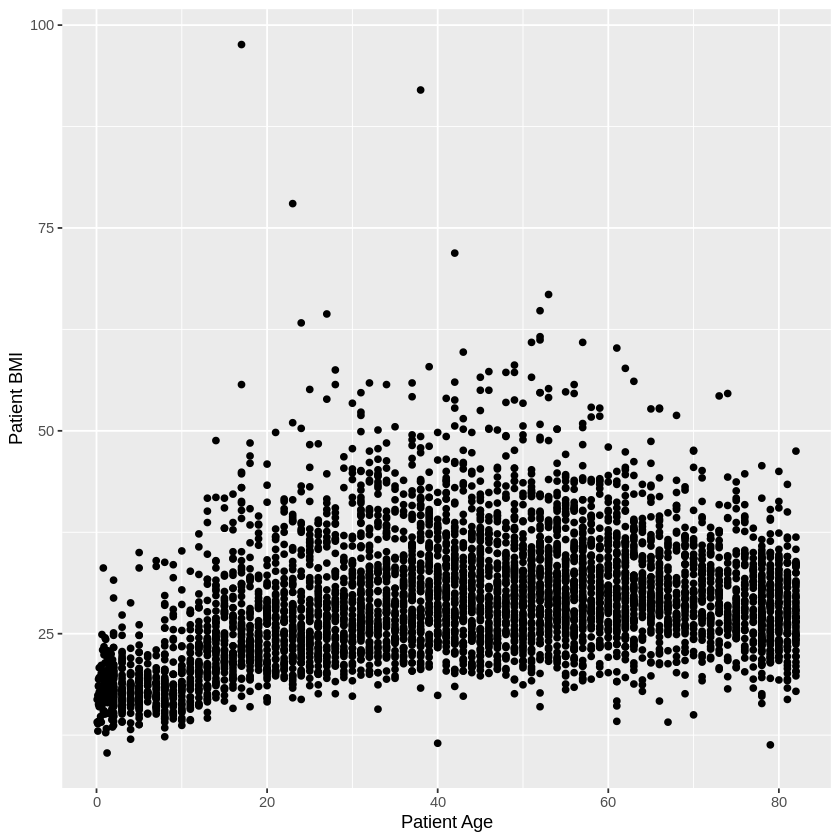

In [ ]:
qplot(stroke$age, stroke$bmi, xlab = "Patient Age", ylab ="Patient BMI")

In [ ]:
stroke$bmi[stroke$bmi >50]<-NA
ImputedData<-mice(stroke, m = 5, method = ifelse(colnames(stroke) == "bmi", "pmm", ""), maxit = 20)
stroke_final<-complete(ImputedData, 5)

summary(stroke_final)


 iter imp variable
  1   1  bmi
  1   2  bmi
  1   3  bmi
  1   4  bmi
  1   5  bmi
  2   1  bmi
  2   2  bmi
  2   3  bmi
  2   4  bmi
  2   5  bmi
  3   1  bmi
  3   2  bmi
  3   3  bmi
  3   4  bmi
  3   5  bmi
  4   1  bmi
  4   2  bmi
  4   3  bmi
  4   4  bmi
  4   5  bmi
  5   1  bmi
  5   2  bmi
  5   3  bmi
  5   4  bmi
  5   5  bmi
  6   1  bmi
  6   2  bmi
  6   3  bmi
  6   4  bmi
  6   5  bmi
  7   1  bmi
  7   2  bmi
  7   3  bmi
  7   4  bmi
  7   5  bmi
  8   1  bmi
  8   2  bmi
  8   3  bmi
  8   4  bmi
  8   5  bmi
  9   1  bmi
  9   2  bmi
  9   3  bmi
  9   4  bmi
  9   5  bmi
  10   1  bmi
  10   2  bmi
  10   3  bmi
  10   4  bmi
  10   5  bmi
  11   1  bmi
  11   2  bmi
  11   3  bmi
  11   4  bmi
  11   5  bmi
  12   1  bmi
  12   2  bmi
  12   3  bmi
  12   4  bmi
  12   5  bmi
  13   1  bmi
  13   2  bmi
  13   3  bmi
  13   4  bmi
  13   5  bmi
  14   1  bmi
  14   2  bmi
  14   3  bmi
  14   4  bmi
  14   5  bmi
  15   1  bmi
  15   2  bmi
  15   3  bmi
  1

       id           gender          age        hypertension heart_disease
 Min.   :   67   Female:2994   Min.   : 0.08   No :4612     No :4834     
 1st Qu.:17741   Male  :2115   1st Qu.:25.00   Yes: 498     Yes: 276     
 Median :36932   Other :   1   Median :45.00                             
 Mean   :36518                 Mean   :43.23                             
 3rd Qu.:54682                 3rd Qu.:61.00                             
 Max.   :72940                 Max.   :82.00                             
 ever_married         work_type    Residence_type avg_glucose_level
 No :1757     children     : 687   Rural:2514     Min.   : 55.12   
 Yes:3353     Govt_job     : 657   Urban:2596     1st Qu.: 77.25   
              Never_worked :  22                  Median : 91.89   
              Private      :2925                  Mean   :106.15   
              Self-employed: 819                  3rd Qu.:114.09   
                                                  Max.   :271.74   
      

In [ ]:
stroke_final<-stroke_final[2:12]
part<-createDataPartition(stroke_final$stroke, p = 0.75, list = FALSE)
train<-stroke_final[part,]
test<-stroke_final[-part,]
dim(train)

[1] 3833   11

In [ ]:
dim(test)

[1] 1277   11

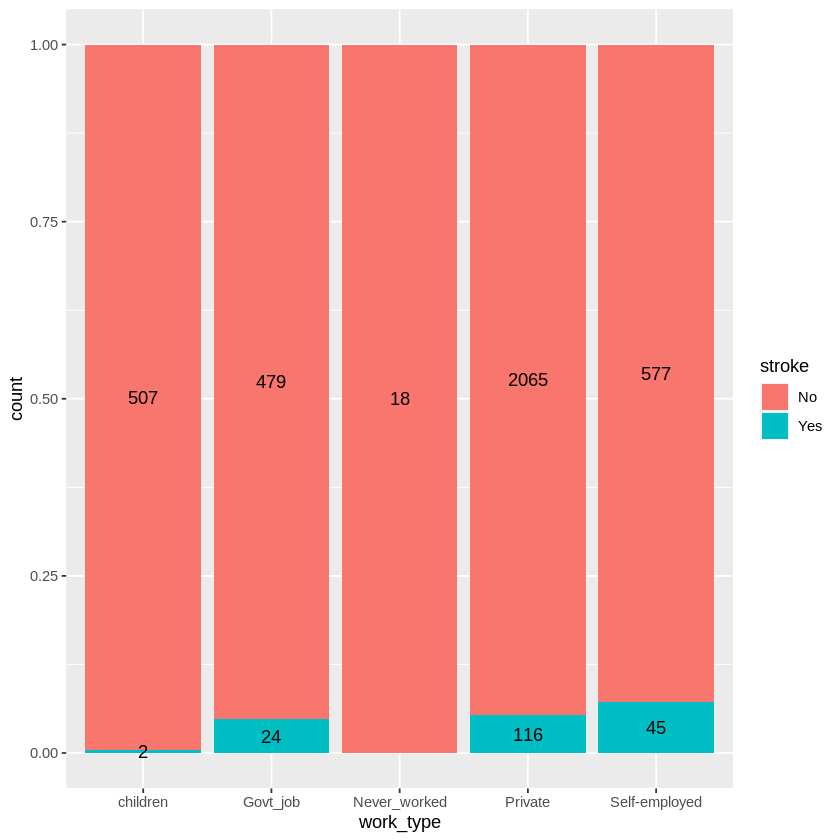

In [ ]:
g1<-ggplot(train, aes(x = work_type, fill = stroke))+
  geom_bar(position = "fill")+
  stat_count(geom = "text",
             aes(label = stat(count)),
             #position = "fill", color = "black"
             position = position_fill(vjust = 0.5), color = "black")
g1

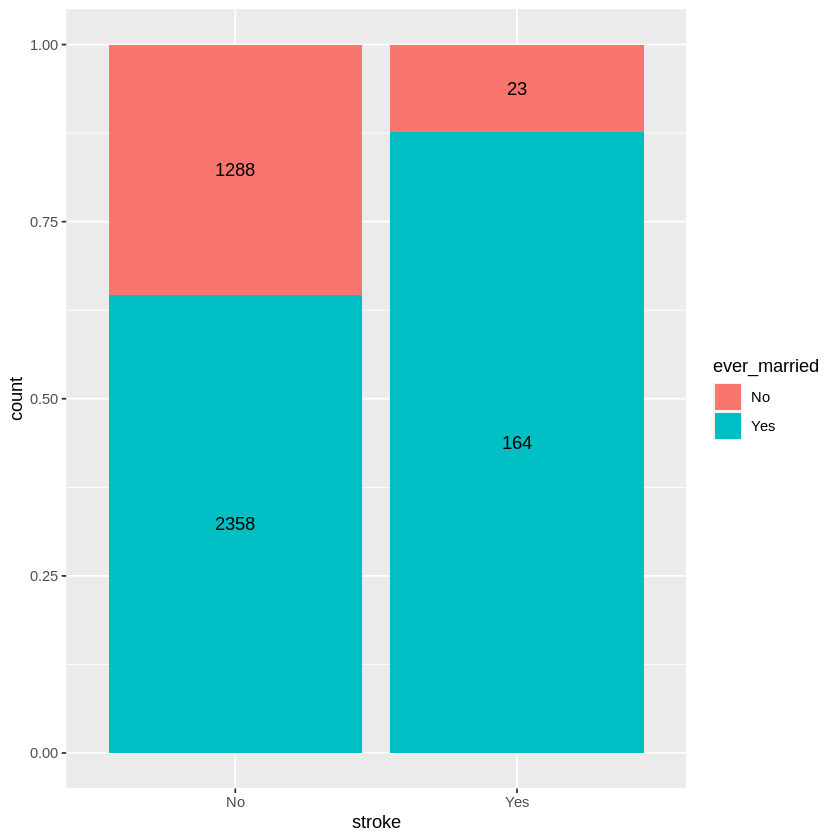

In [ ]:
g2<-ggplot(train, aes(x = stroke, fill = ever_married))+
  geom_bar(position = "fill")+
  stat_count(geom = "text",
             aes(label = stat(count)),
             #position = "fill", color = "black"
             position = position_fill(vjust = 0.5), color = "black")
g2


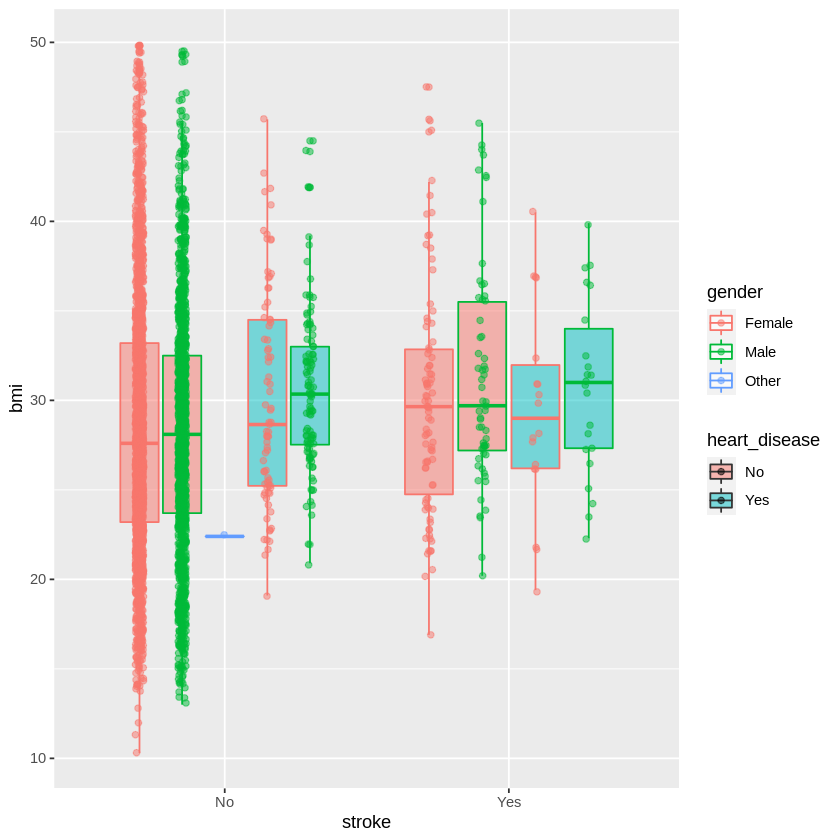

In [ ]:
g3<-ggplot(train, aes(x = stroke, y = bmi, fill = heart_disease, color = gender))+
  geom_boxplot(alpha = 0.5) +
  geom_point(alpha = 0.5, position = position_jitterdodge(jitter.width = 0.1, jitter.height = 0.1))
g3


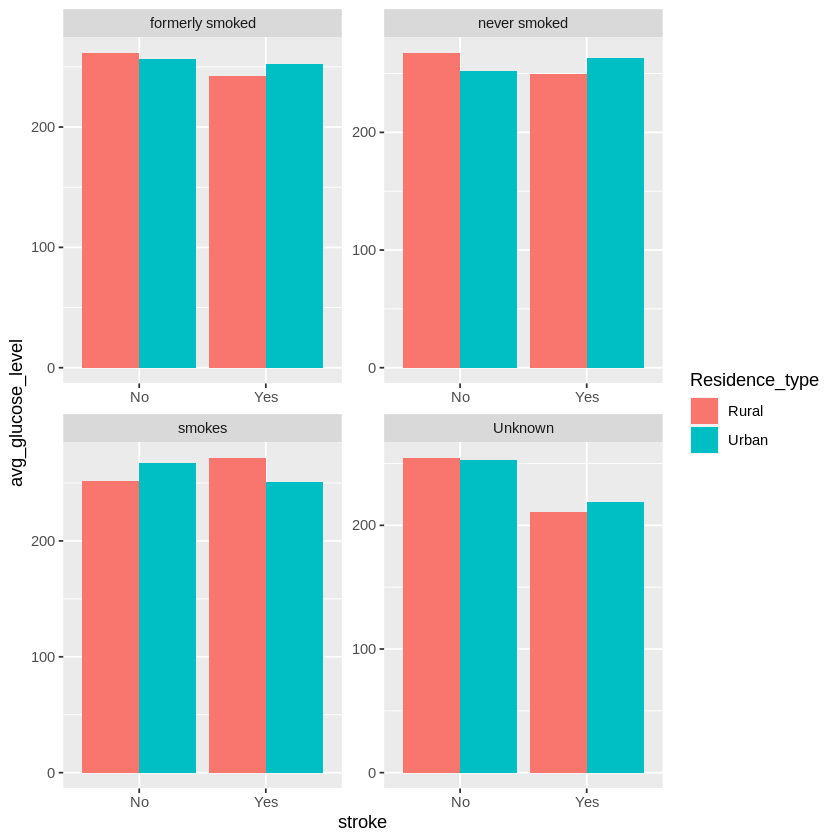

In [ ]:
g6<-ggplot(train, aes(x = stroke, y = avg_glucose_level))+
  geom_bar(aes(fill = Residence_type),stat = "identity", position = position_dodge(0.9))+
  facet_wrap(~smoking_status, scales = "free")
g6

In [ ]:
fit<-randomForest(stroke~.,
                       data = train,
                       proximity = TRUE)

confusionMatrix(predict(fit, test), test$stroke)

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1215   62
       Yes    0    0
                                          
               Accuracy : 0.9514          
                 95% CI : (0.9382, 0.9626)
    No Information Rate : 0.9514          
    P-Value [Acc > NIR] : 0.5337          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 9.408e-15       
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.9514          
         Neg Pred Value :    NaN          
             Prevalence : 0.9514          
         Detection Rate : 0.9514          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : No              
                        

In [ ]:
#Re-sample using "both" method from ROSE library
both<-ovun.sample(stroke~.,
                  data = train,
                  method = "both",
                  p = 0.5,
                  N = 3833)$data

#Control function for building model
ctrl<-trainControl(method = "repeatedcv",
                   number = 10,
                   repeats = 5,
                   summaryFunction = twoClassSummary,
                   classProbs = TRUE)

#Weight function for the model
model_wts<-ifelse(train$stroke == "Yes",
                  (1/table(train$stroke)[1])*0.5,
                  (1/table(train$stroke)[2])*0.5)

rf_model<-randomForest(stroke~.,
                       data = both,
                       trControl = ctrl,
                       weights = model_wts,
                       proximity = TRUE)
rf_model


Call:
 randomForest(formula = stroke ~ ., data = both, trControl = ctrl,      weights = model_wts, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 1.88%
Confusion matrix:
      No  Yes  class.error
No  1867   71 0.0366357069
Yes    1 1894 0.0005277045

In [ ]:
confusionMatrix(predict(rf_model, test), test$stroke)


Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1129   50
       Yes   86   12
                                          
               Accuracy : 0.8935          
                 95% CI : (0.8753, 0.9099)
    No Information Rate : 0.9514          
    P-Value [Acc > NIR] : 1.000000        
                                          
                  Kappa : 0.0962          
                                          
 Mcnemar's Test P-Value : 0.002689        
                                          
            Sensitivity : 0.9292          
            Specificity : 0.1935          
         Pos Pred Value : 0.9576          
         Neg Pred Value : 0.1224          
             Prevalence : 0.9514          
         Detection Rate : 0.8841          
   Detection Prevalence : 0.9233          
      Balanced Accuracy : 0.5614          
                                          
       'Positive' Class : No              
                        